# Meta (Facebook) Q3 Earnings Call and Founder's Letter
This Notebook will be used to practice NLP on Meta's Q3 2021 Earnings call as well as their statement that explained the changing of the company's name form Facebook to Meta.

#### Imports:

In [1]:
import numpy as np
import pandas as pd
import random

from PyPDF2 import PdfFileReader
import tkinter
import re
import unicodedata
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, get_single_color_func


import matplotlib.pyplot as plt
import seaborn as sns

import prepare as prep

## Q3 Earnings Call Transcripts

In [28]:
all_pages = ""
filename = 'FB-Q3-2021-Earnings-Call-Transcript.pdf'
reader = PdfFileReader(filename)
page_obj = reader.getNumPages()
for page_count in range(page_obj):
    page = reader.getPage(page_count)
    page_data = page.extractText()
    all_pages = " ".join((all_pages, page_data))
#all_pages

In [29]:
clean_q3_letter = prep.prep_a_writting(all_pages)

In [30]:
# Count of the top ten words used in the Q3 Earnings letter:
clean_q3_letter = prep.prep_a_writting(all_pages)
q3_series = pd.Series(clean_q3_letter.split())
q3_series.value_counts().head(10)

think       66
people      51
year        39
going       32
next        32
us          30
question    29
billion     29
dave        28
quarter     26
dtype: int64

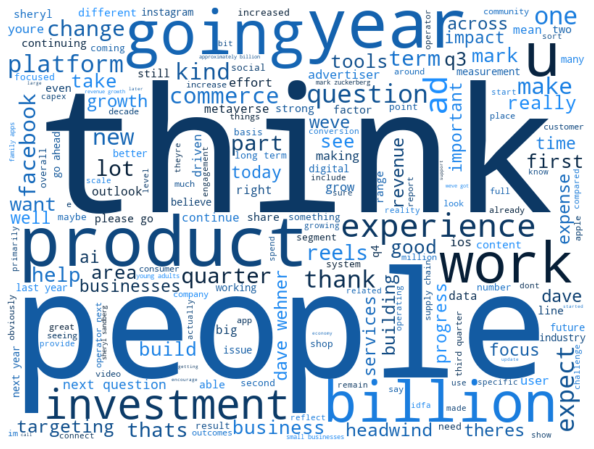

In [31]:
# Creating a WordCloud
color_func1 = get_single_color_func('dodgerblue')

plt.figure(figsize=(12, 8))
img = WordCloud(background_color='white', width=800, height=600).generate(clean_q3_letter)
plt.imshow(img.recolor(color_func=color_func1, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

## Founders Letter 2021

In [3]:
# Web scrapping the letter from Meta's webpage:
response = requests.get('https://about.fb.com/news/2021/10/founders-letter/', 
                       headers={'user-agent': 'codeup data science germain cohort'})
html = response.text
# html

In [4]:
# Using beautifulSoup to oranize the text
soup = BeautifulSoup(html)
# soup

In [5]:
# Selecting only the text form the letter:
letter = soup.select('div.entry-content')[0].text
# letter

In [8]:
# Count of the top ten words used in the meta founders letter:
letter_clean = prep.prep_a_writting(letter)
letter_series = pd.Series(letter_clean.split())
letter_series.value_counts().head(10)


people       18
metaverse    15
future       13
company      13
one          12
build        12
new          12
social       10
next          9
weve          8
dtype: int64

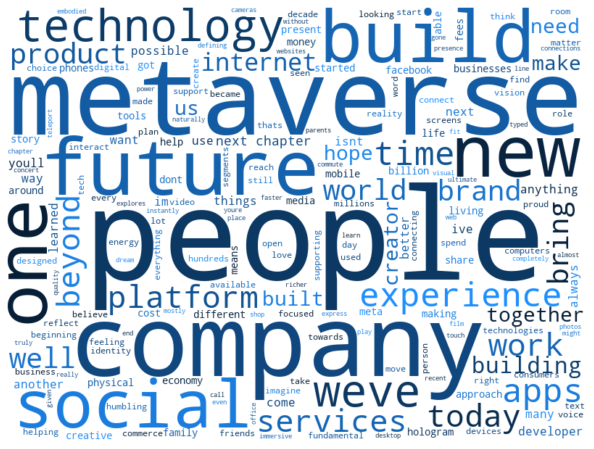

In [32]:
# Creating a WordCloud
color_func1 = get_single_color_func('dodgerblue')

plt.figure(figsize=(12, 8))
img = WordCloud(background_color='white', width=800, height=600).generate(letter_clean)
plt.imshow(img.recolor(color_func=color_func1, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()